# PHYS555 - Machine Learning Project - Q2
Karlee Zammit - V00823093

## Use 'sklearn.svm.SVC' to classify your data. Then, compare results (taken from different metrics such as confusion matrices, accuracy, recall and precision, recall and AUC) with the best results obtained from an ANN model and discuss the comparisons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter  
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Functions

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load in Data and Balance Via Undersampling

In [3]:
# Load in data and print out a few rows, as well as the shape of the data
df = pd.read_csv('covtype.csv')
print(df.shape)
df.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>],
       [<AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Cover_Type'}>, <AxesSubplot:>]],
      dtype=object)

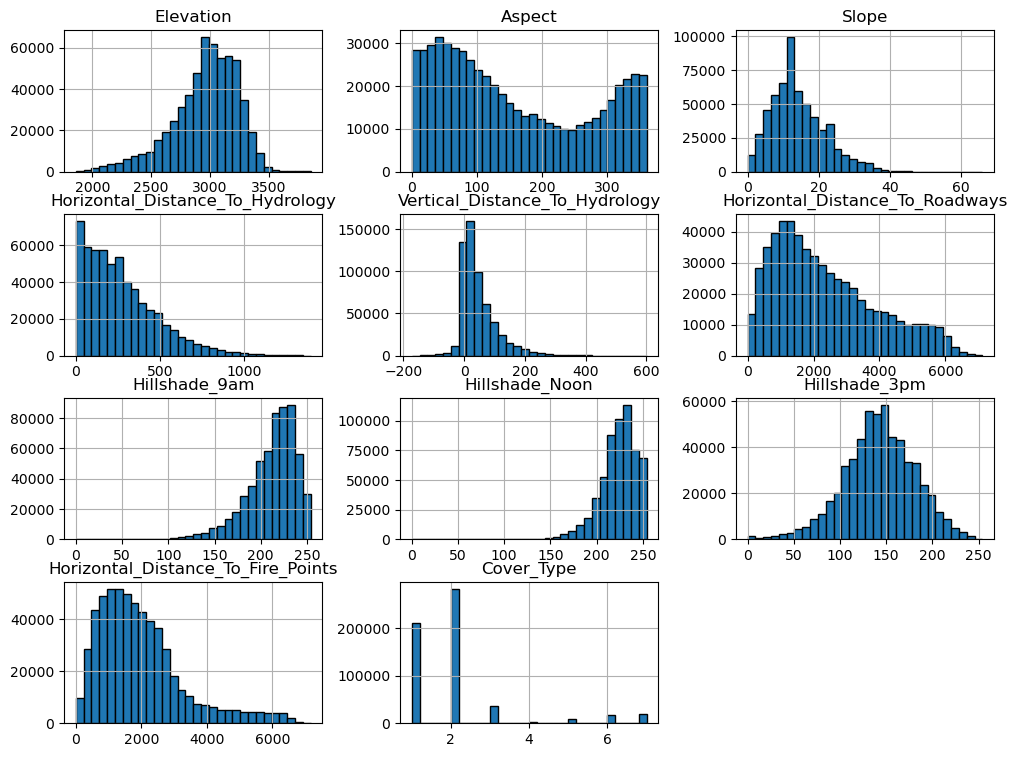

In [4]:
# Plot a histogram of the continuous variables, and the target variable
df_cont = df.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1)

df_cont.hist(figsize=(12, 9), bins=30, edgecolor="black")

In [5]:
# This one takes forever... might not be appropriate for this dataset, unless I can save it once it's done 
#cnn = CondensedNearestNeighbour(n_neighbors=3, sampling_strategy='auto', random_state=42)
X = df.drop(["Cover_Type"], axis=1).values
y = df["Cover_Type"].values
print('Original dataset shape %s' % Counter(y))  
#X_res, y_res = cnn.fit_resample(X, y)
#print('Resampled dataset shape %s' % Counter(y_res))  

Original dataset shape Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


In [6]:
# This might be better because it's such a huge dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
print(X_res.shape)
print(y_res.shape)

Resampled dataset shape Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})
(19229, 54)
(19229,)


In [7]:
ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y_res,(-1,1))
tar = ohe.fit_transform(tar)

X_tr, X_va, Y_tr, Y_va = train_test_split(X_res, tar, test_size=0.25)
print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))

# Normalize the data, as was done in Q2
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

training set ==  (14421, 54) (14421, 7) ,, validation set ==  (4808, 54) (4808, 7)


# ANN

In [ ]:
ann_pipeline = Pipeline([('ANNcls', MLPClassifier(hidden_layer_sizes=(20,20)))])
            
params = [{'ANNcls__activation':['relu', 'tanh'], 'ANNcls__solver':['sgd', 'adam'], 'ANNcls__learning_rate':['constant', 'invscaling', 'adaptive'], 
          'ANNcls__max_iter':[2000,3000], 'ANNcls__validation_fraction':[0.1, 0.2]}]

gs_ann = GridSearchCV(ann_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_ann.fit(X_tr_Norm, Y_tr)
#.argmax(axis=1)

gs_ann.best_params_

In [ ]:
print(str(gs_ann.best_params_))

In [8]:
clf_ANN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20,20), max_iter=200, early_stopping=True, validation_fraction=0.1)

## fitting the model:
clf_ANN.fit(X_tr_Norm, Y_tr)

## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
ANN_prob_tr = clf_ANN.predict_proba(X_tr_Norm)
ANN_pred_tr = clf_ANN.predict(X_tr_Norm)

ANN_prob_va = clf_ANN.predict_proba(X_va_Norm)
ANN_pred_va = clf_ANN.predict(X_va_Norm)

Normalized confusion matrix
[[0.42148148 0.26074074 0.09185185 0.03703704 0.07111111 0.08592593
  0.03185185]
 [0.19       0.70666667 0.         0.         0.10333333 0.
  0.        ]
 [0.         0.00831601 0.73804574 0.01663202 0.01871102 0.21829522
  0.        ]
 [0.         0.         0.10413885 0.83711615 0.         0.05874499
  0.        ]
 [0.01333333 0.10833333 0.01666667 0.         0.85166667 0.00833333
  0.00166667]
 [0.00338409 0.04906937 0.21827411 0.03045685 0.02876481 0.67005076
  0.        ]
 [0.10854817 0.01356852 0.         0.         0.         0.
  0.87788331]]


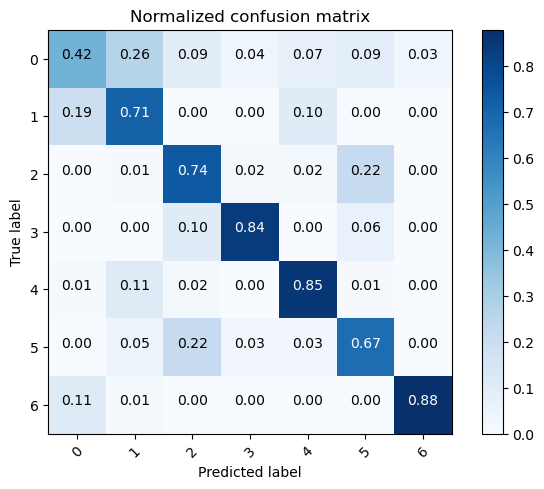

In [9]:
cnf_matrix_ANN = confusion_matrix(ANN_pred_va.argmax(axis=1), Y_va.argmax(axis=1))
plt.figure()
plot_confusion_matrix(cnf_matrix_ANN, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized confusion matrix')

# Support Vector Machine

Initially, I used a pipeline to determine the best parameters for the SVM classifier. For the sake of time when rerunning, I've commented out the pipeline and initilized in the cell below.

In [29]:
#\sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

#svm_pipeline = Pipeline([('PCA', PCA()), ('svc', SVC(decision_function_shape = 'ovr'))])
            
#params = [{'PCA__n_components':[.7, .9, .999], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'svc__gamma':['scale', 'auto'], 'svc__degree':[2, 3, 4]}]

#gs_svm = GridSearchCV(svm_pipeline,
#                      param_grid=params,
#                      scoring='accuracy',
#                      cv=5)

#gs_svm.fit(X_tr_Norm, Y_tr.argmax(axis=1))

#gs_svm.best_params_

We have now determined that these parameters are best: 
- All components (ie. do not use PCA)
- The 'rbf' kernel (meaning that the degree variable is not used)
- The 'scale' gamma 

In [ ]:
# Now I need to determine the best value of C (defaults otherwise, using the rbf kernel)
svm_pipeline2 = Pipeline([('svc', SVC(decision_function_shape = 'ovr', kernel='rbf'))])

params = [{'svc__gamma':['scale', 'auto'], 'svc__C':[1,2,3,4]}]

gs_svm2 = GridSearchCV(svm_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_svm2.fit(X_tr_Norm, Y_tr.argmax(axis=1))

gs_svm2.best_params_

In [30]:
# For the sake of future run times, I will comment out the above code, and simplify it for future runs: 
#clf_svm = SVC(decision_function_shape='ovr', kernel='rbf', gamma='scale')

## fitting the model:
#clf_svm.fit(X_tr_Norm, Y_tr.argmax(axis=1))

SVC()

In [31]:
# Using those parameters, determine the training and validation predictions 
X_pred_tr = clf_svm.predict(X_tr_Norm)
X_pred_va = clf_svm.predict(X_va_Norm)

#X_pred_tr=clf.predict(X_tr_Norm)
#X_pred_va=clf.predict(X_va_Norm)

Normalized confusion matrix
[[0.67061924 0.21475626 0.         0.         0.01185771 0.00263505
  0.10013175]
 [0.21194605 0.64932563 0.00963391 0.         0.10597303 0.02312139
  0.        ]
 [0.00159236 0.02229299 0.68630573 0.02547771 0.03343949 0.23089172
  0.        ]
 [0.         0.         0.11083744 0.81280788 0.         0.07635468
  0.        ]
 [0.02588556 0.16757493 0.03133515 0.         0.75476839 0.01771117
  0.0027248 ]
 [0.01780415 0.04599407 0.21810089 0.04005935 0.03709199 0.64094955
  0.        ]
 [0.09530792 0.0058651  0.         0.         0.         0.
  0.89882698]]


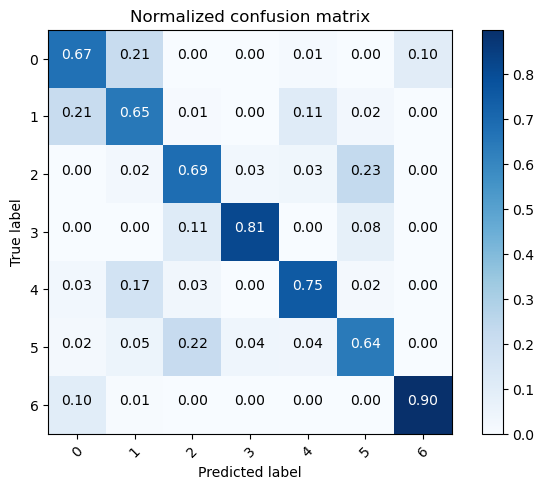

In [32]:
cnf_matrix = confusion_matrix(X_pred_va, Y_va.argmax(axis=1))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized confusion matrix')

# References 

**Forest Cover Dataset:**
https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html